In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:

image = mpimg.imread('../img/signs_vehicles_xygrad.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1


In [30]:

def plot_side_by_side(image1, image2):
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

    
def apply_threshold(image, thresh=(90, 255)):
    """Threshold a single channel (2d) image."""
    if len(image.shape) != len(thresh):
        raise ValueError('image should be single channel 2d')
    binary = np.zeros_like(image)
    binary[(image > thresh[0]) & (image <= thresh[1])] = 1
    return binary


def get_hls(image):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    return H, L, S

def get_rgb(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    return R, G, B

# def weighted_sum(image_thresh_dict):

#     binaries = [apply_threshold(i, k) for i,k in image_thresh_dict.iteritems()]
#     binary = mean(binaries)
#     plot_side_by_side( mean(image_thresh_dict.keys()), binary)

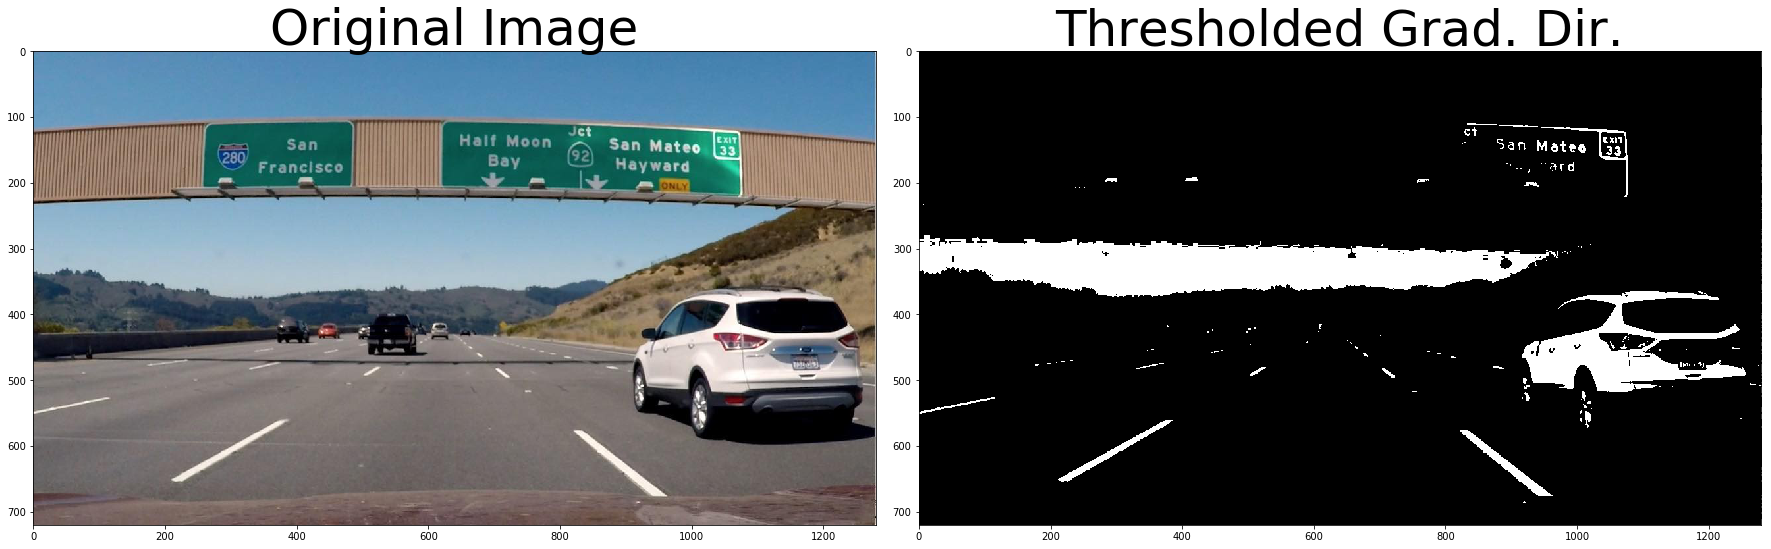

In [4]:
plot_side_by_side(image, binary)

In [5]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

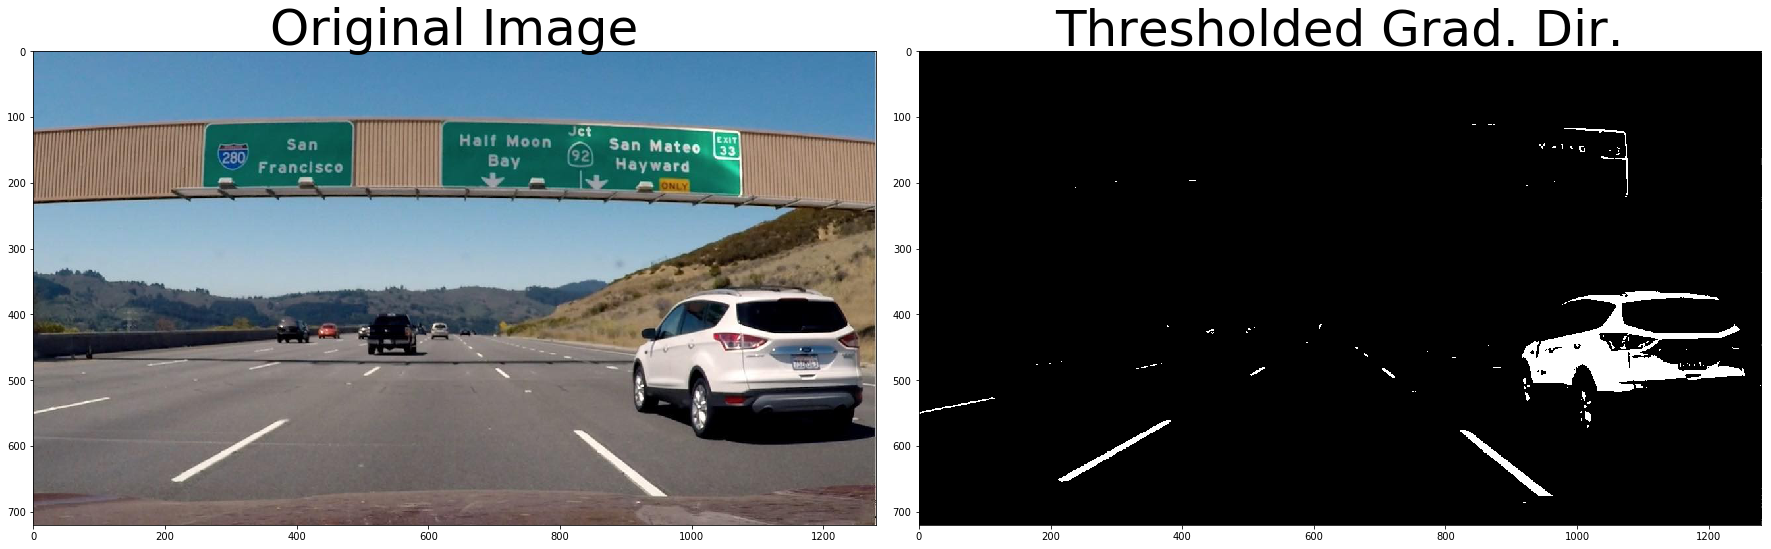

In [6]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plot_side_by_side(image, binary)

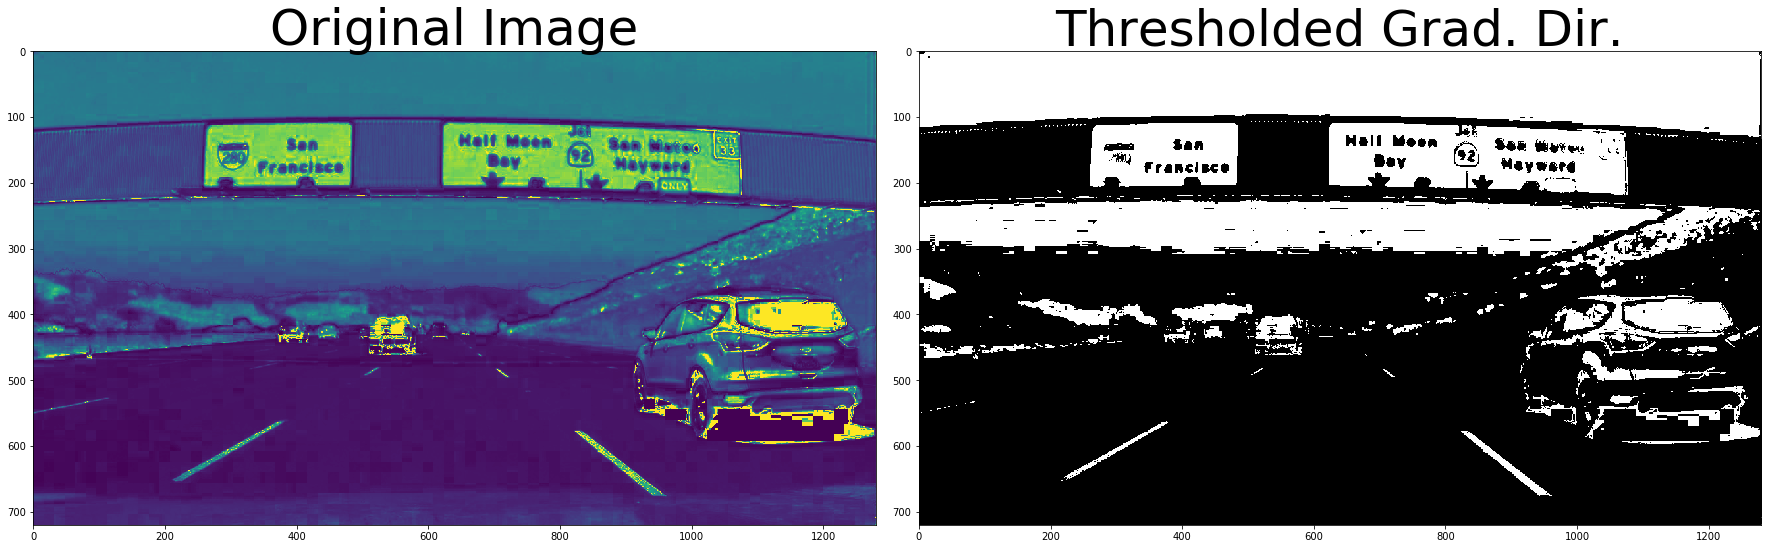

In [23]:

H, L, S = get_hls(image)
binary = threshold(S, thresh=(90, 255))
plot_side_by_side(S, binary)

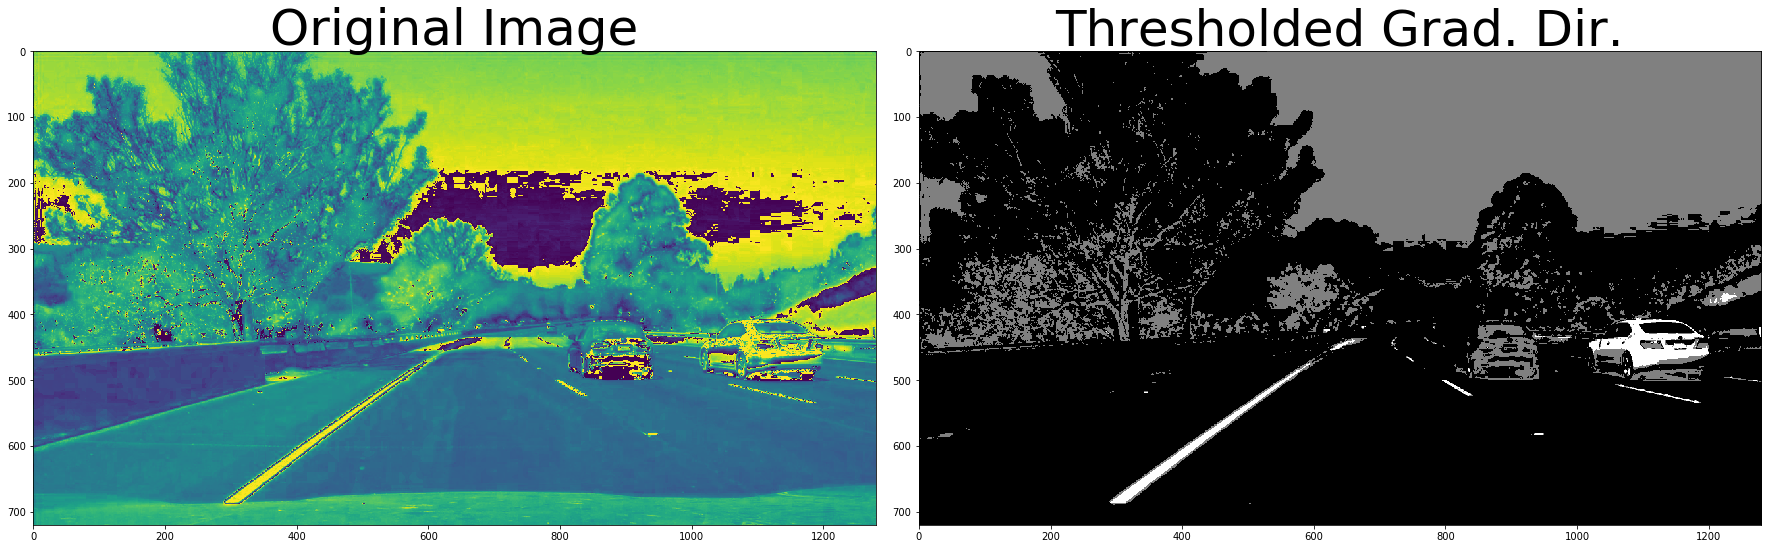

In [27]:
image = mpimg.imread('../test_images/test6.jpg')
R, G, B = get_rgb(image)
H, L, S = get_hls(image)
binaryR = threshold(R, thresh=(200, 255))
binaryS = threshold(S, thresh=(90, 255))

binary = (binaryR + binaryS) / 2.0
plot_side_by_side((R+S)/2.0, binary)

In [32]:
weighted_sum([(R,(200, 255)), (S, (90, 255))])

SyntaxError: invalid syntax (<ipython-input-32-49761edfd6fd>, line 1)

array([[253, 240, 196, ...,  18,  22,  27],
       [243, 186, 136, ...,  78,  53,   7],
       [201, 138, 128, ...,  99,  94,  53],
       ..., 
       [ 70, 110, 105, ...,  95,  98, 102],
       [103,  82,  97, ...,  81,  89, 111],
       [172,  70, 119, ...,  77,  88, 114]], dtype=uint8)